In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('JGW-PPT')
import pandas as pd
from LinReg import PolyReg

os.getcwd()

'C:\\Users\\jgage\\Documents\\GitHub\\CHEM274'

In [33]:
data_path = r"C:\Users\jgage\OneDrive - Stanford\2021\CHEM 274\Labs\E3\KOH titration.txt"
KHP_df = pd.read_csv(data_path, sep = ',')

# Calibration Data
steps_per_mL = 4800
n_KHP = 0.998 * (1.025*10**4)
y_scale_factor = 10**3

cal_data = pd.DataFrame(((4 ,0.172478830179777,0.0004892423073316135),
                         (7 ,0.002718232570994735,0.0004949013695150583),
                         (10,-0.17839986224297638,0.0005452112154405124)),
                        columns=['pH', 'mean potential', 'std dev'])
cal_reg = PolyReg(cal_data['mean potential'], cal_data['pH'], 1)
cal_reg2 = PolyReg(cal_data['pH'], cal_data['mean potential'], 1)
cal_reg3 =PolyReg(- cal_data['pH'], cal_data['mean potential'], 1)



KHP_df['V_KOH / mL'] = KHP_df['step'] / steps_per_mL
KHP_df['pH cal'] = cal_reg.eval(KHP_df['mean potential'])

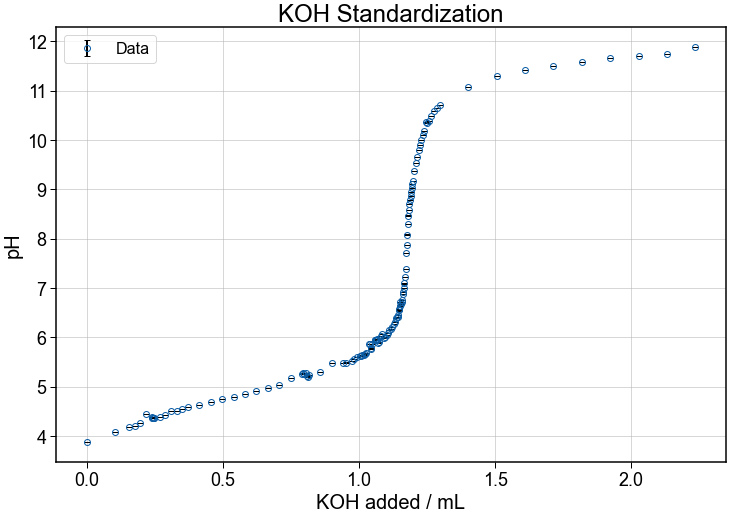

In [34]:
xdata = KHP_df['V_KOH / mL']
ydata = KHP_df['pH cal']
fig3, ax3 = plt.subplots()
ax3.errorbar(x = xdata , y = ydata,
             yerr = KHP_df['std dev'], fmt='o', mfc='none', ecolor='k', label='Data')

ax3.set_title('KOH Standardization')
ax3.set_xlabel('KOH added / mL')
ax3.set_ylabel('pH')

# ax3.plot(xdata, y_model, label='Model')
ax3.legend()

In [52]:
def E_predict(aH, kHI, aI):
    '''
    Returns E_cell based on Nicolsky-Eisenman equation
    '''
    R, T, F = 8.314, 298, 96485
    m = R * T * np.log(10)/ F
    aHref = 10**(-7)
    num = aH + (kHI*aI)
    denom = aHref
    return m*np.log10(num/denom)

coef_deg1       0.058480
std_err_deg1    0.001093
coef_deg0       0.408291
std_err_deg0    0.008105
r_squared       0.999651
s_y             0.004637
dtype: float64


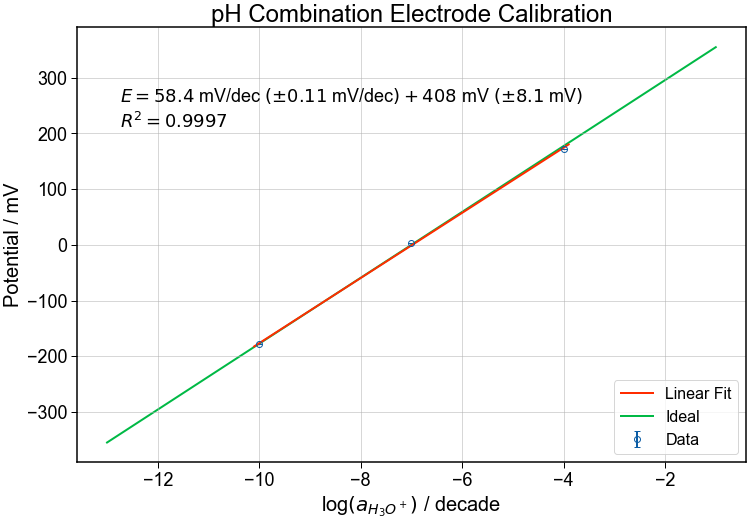

In [58]:
# Sanity Check
fig, ax = plt.subplots()
ax.errorbar(x = -cal_data['pH'],
            y = y_scale_factor * cal_data['mean potential'] ,
            yerr = cal_data['std dev'],
            fmt='o', fillstyle='none', label="Data")
ax.set_title('pH Combination Electrode Calibration')
ax.set_ylabel('Potential / mV')
ax.set_xlabel('log$(a_{H_3 O^+})$ / decade')
# ax.plot(KHP_df['pH cal'], KHP_df['mean potential'])
cal_range = np.linspace(-3.9, -10.1, 124)
ax.plot(cal_range, y_scale_factor*(cal_reg3.eval(cal_range)), label='Linear Fit')
ax.annotate(r'$E = 58.4$ mV/dec $ (\pm 0.11 $ mV/dec$) + 408$ mV $ (\pm 8.1$ mV$)$',
            (-8, 100),
            xytext=(0.065,.83),
            textcoords='axes fraction',
            fontsize=18)
ax.annotate(r'$R^2 = 0.9997$',
            (-8, 100),
            xytext=(0.065,.77),
            textcoords='axes fraction',
            fontsize=18)

x_pH = np.linspace(1, 13, 20000)
ax.plot(-x_pH,
         y_scale_factor * E_predict(10**(-x_pH), 0, 0.01),
         label='Ideal', zorder=0)
ax.legend(loc='lower right')
print(cal_reg3.report())

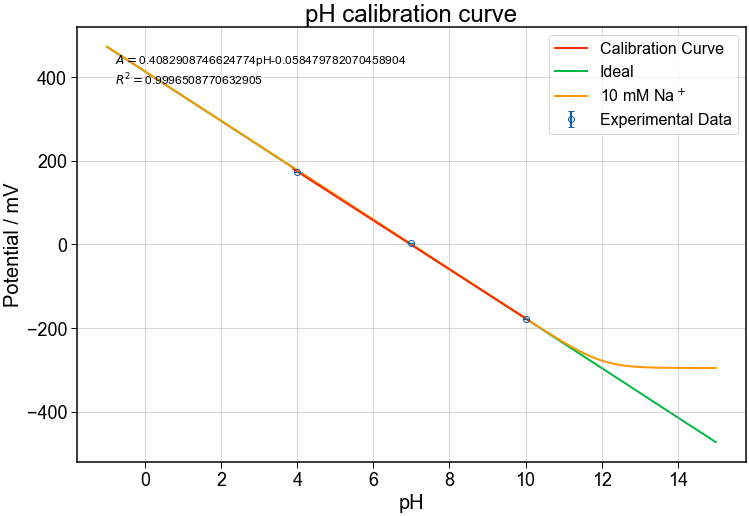

In [7]:
fig2, ax2 = plt.subplots()
ax2.errorbar(x = cal_data['pH'],
             y = y_scale_factor * cal_data['mean potential'] ,
             yerr = cal_data['std dev'],
             fmt='o', fillstyle='none', label='Experimental Data', zorder=2)

ax2.plot(cal_range, y_scale_factor* ((cal_range - cal_reg.coef[1])/ cal_reg.coef[0]),
         label='Calibration Curve', zorder=1)

fig2.text(0.01, 0.9,
         r'$A =$'
         + str(float(cal_reg2.coef[1]))
         + r'pH'
         + str(float(cal_reg2.coef[0])) + '\n'
         + r'$R^{2}=$' + str(float(cal_reg2.r_squared)),
         horizontalalignment='left',
         size=12,
         verticalalignment='top',
         transform=ax.transAxes)

ax2.plot(x_pH,
         y_scale_factor * E_predict(10**(-x_pH), 0, 0.01),
         label='Ideal', zorder=0)
ax2.plot(x_pH,
         y_scale_factor * E_predict(10**(-x_pH), 10**(-10), 0.01),
         label='10 mM Na$^+$', zorder=0)

ax2.set_title('pH calibration curve')
ax2.set_ylabel('Potential / mV')
ax2.set_xlabel('pH')
ax2.legend()

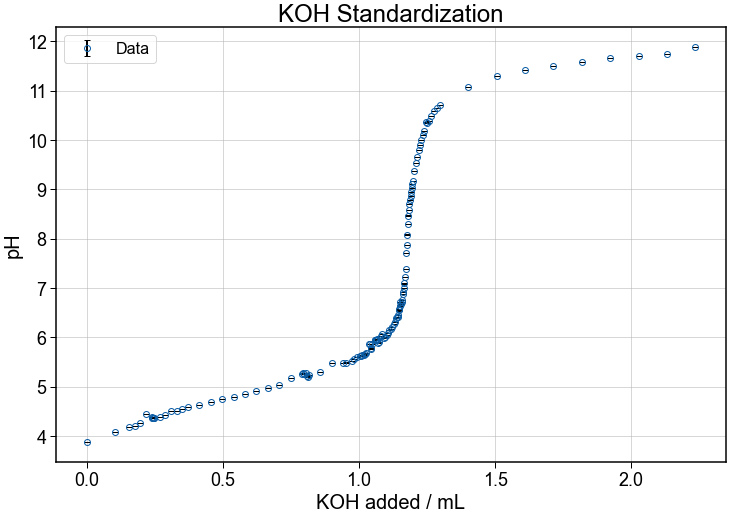

In [9]:
j = E_predict(10**-7, 0, 0.01)
